In [ ]:
%pip install pandas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json as json


In [ ]:
# Read the file line by line and parse each JSON object
# drop na
with open('data_set.json', 'r') as file:
    data = [json.loads(line) for line in file]
    data = pd.DataFrame(data)
    data = data.dropna()
    print(type(data))
    print(data)

<class 'pandas.core.frame.DataFrame'>
                                                   text  label
0                               i didnt feel humiliated      0
1     i can go from feeling so hopeless to so damned...      0
2      im grabbing a minute to post i feel greedy wrong      3
3     i am ever feeling nostalgic about the fireplac...      2
4                                  i am feeling grouchy      3
...                                                 ...    ...
4995  i know that this pair of socks took about two ...      3
4996  i can feel the frantic beat of his heart but c...      4
4997                                    during lectures      1
4998  i did feel a little lighter in spirit now that...      3
4999   i run to him when i feel threatened and insecure      4

[5000 rows x 2 columns]


In [ ]:
# Vectorize training data & testing data
vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(data["text"])

print(type(X))
print(X)


<class 'scipy.sparse._csr.csr_matrix'>
  (0, 1949)	0.607347140716774
  (0, 2684)	0.1637982291493457
  (0, 3506)	0.7773670888265707
  (1, 1024)	0.1638676294826315
  (1, 3067)	0.2023776757369186
  (1, 2921)	0.3664714615608064
  (1, 2688)	0.09631396329720712
  (1, 6561)	0.2537092577750457
  (1, 3454)	0.2768388875651647
  (1, 7301)	0.08268189559540533
  (1, 1734)	0.36519630763360295
  (1, 3452)	0.28290158785561714
  (1, 3917)	0.15209141157616116
  (1, 652)	0.18028652397251538
  (1, 377)	0.21485696841539076
  (1, 6601)	0.22276585216833225
  (1, 7968)	0.18905930924153808
  (1, 1060)	0.343037323542902
  (1, 262)	0.07781415824567972
  (1, 3798)	0.13609092191972597
  (1, 495)	0.3129694556992596
  (2, 2684)	0.08389233886654385
  (2, 7301)	0.11545477461893315
  (2, 3560)	0.18539096088768248
  (2, 3099)	0.5345105122810344
  :	:
  (4998, 2843)	0.1062295387915611
  (4998, 3607)	0.09398396004614655
  (4998, 4860)	0.14837452034832102
  (4998, 4428)	0.10926903739148457
  (4998, 4685)	0.0905363609913015

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data["label"], test_size=0.3, random_state=1)
print(type(X_train), len(y_train))

<class 'scipy.sparse._csr.csr_matrix'> 3500


In [ ]:
print(X_train)

  (0, 2684)	0.06954027582361652
  (0, 7185)	0.09949484315909723
  (0, 4917)	0.11863576512178471
  (0, 8151)	0.18761827208883702
  (0, 361)	0.19809161106851322
  (0, 7205)	0.23962666480147884
  (0, 5298)	0.38016637702889483
  (0, 3102)	0.38016637702889483
  (0, 5188)	0.39706074643965317
  (0, 1975)	0.4430679720799756
  (0, 2188)	0.4430679720799756
  (1, 2684)	0.04591601372277659
  (1, 7301)	0.06319078818622774
  (1, 14)	0.1093643032293711
  (1, 3986)	0.13208097021808166
  (1, 7182)	0.07833275544032312
  (1, 400)	0.23615126052802493
  (1, 3607)	0.08621982326723661
  (1, 5152)	0.2215994328885219
  (1, 4657)	0.14853925460201745
  (1, 1947)	0.16187410302016852
  (1, 7911)	0.18267404523172726
  (1, 7205)	0.1582205577854678
  (1, 144)	0.3334349715805806
  (1, 4596)	0.2038930905915442
  :	:
  (3498, 7930)	0.13867720464445904
  (3498, 7943)	0.10070848225061306
  (3498, 4101)	0.1532592639052895
  (3498, 2698)	0.1407431963724174
  (3498, 2910)	0.20623408167197776
  (3498, 4285)	0.1713902660715469

In [ ]:
#DECISION TREE DEFAULT
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


preds = clf.predict(X_test)
print("THIS IS PREDS", len(preds))
accuracy_tree = accuracy_score(y_test, preds)

#print(f'Accuracy of the Decision Tree: {accuracy_tree * 100:.2f}%')
print(f'Accuracy: {accuracy_tree * 100:.2f}%')

THIS IS PREDS 1500
Accuracy: 59.13%


In [ ]:
#Decision tree parameters list
DT_parameters_list = [("Max_depth=5", 35.07), ("Max_depth=50", 45.67), ("Max_depth=100", 57.07), ("Max_depth=250",  59.13), ("Max_depth=500",  59.13)]

In [ ]:
#RANDOM FOREST DEFAULT
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=100, random_state=42)
rf.fit(X_train, y_train)

preds_forest = rf.predict(X_test)

accuracy_forest = accuracy_score(y_test, preds_forest)

print(f'Accuracy: {accuracy_forest * 100:.2f}%')

Accuracy: 69.33%


In [ ]:
RF_parameters_list = [("Max_depth=5", 33.47), ("Max_depth=50", 61.53), ("Max_depth=100", 69.33), ("Max_depth=250",  68.87), ("Max_depth=500",  69.20)]

In [ ]:
#MLP DEFAULT
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
mlp_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy_mlp = accuracy_score(y_test, mlp_pred)
print(f'Accuracy: {accuracy_mlp * 100:.2f}%')

Accuracy: 75.80%


In [ ]:
MLP_parameters_list = [("Max_iter=100", 75.80), ("Max_iter=250", 75.80), ("Max_iter=500", 75.80), ("Max_iter=1000", 75.80), ("Max_iter=2000", 75.80)]

In [ ]:
#K-NEAREST DEFAULT

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, knn_pred)
# Predict on dataset which model has not seen before
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 63.60%


In [ ]:
KNN_parameters_list = [("N_neighbors=3", 61.53), ("N_neighbors=5", 63.20), ("N_neighbors=7", 63.93), ("N_neighbors=10", 65.20), ("N_neighbors=20", 63.60)]

In [ ]:
#LOGISTIC REGRESION DEFAULT
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(multi_class='multinomial', max_iter=500, random_state=42)

log.fit(X_train, y_train)

log_pred = log.predict(X_test)

accuracy_log = accuracy_score(y_test, log_pred)
print(f'Accuracy: {accuracy_log * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 66.07%


In [ ]:
LOG_parameters_list = [("Max_iter=100", 66.07), ("Max_iter=250", 66.07), ("Max_iter=500", 66.07), ("Max_iter=800", 66.07), ("Max_iter=1000", 66.07)]

In [ ]:
#GRID SEARCH DECISION TREE
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification


param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiating the GridSearchCV object
clf_cv = GridSearchCV(clf, param_grid, cv=3)

# Fit the GridSearchCV object to the data
clf_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Logistic Regression Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score is 0.6753814029120816


In [ ]:
#GRID SEARCH RANDOM FOREST
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification


param_grid = {
    'n_estimators': [100, 200, 300],       # Liczba drzew w lesie
    'max_features': ['sqrt', 'log2'],     # Liczba cech branych pod uwagę przy podziale
    'max_depth': [10, 20, 30, None],      # Maksymalna głębokość drzewa
    'min_samples_split': [2, 5, 10],      # Minimalna liczba próbek do podziału węzła
    'min_samples_leaf': [1, 2, 4],        # Minimalna liczba próbek w liściu
}

# Instantiating the GridSearchCV object
rf_cv = GridSearchCV(rf, param_grid, cv=3)

# Fit the GridSearchCV object to the data
rf_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

Tuned Random Forest Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best score is 0.6237083450305548


In [ ]:
#RANDOM SEARCH K-NEARES NEIGHBORS
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


param_random = {
    'n_neighbors': [3, 5, 7, 9],         # Liczba sąsiadów
    'weights': ['uniform', 'distance'], # Jednakowe wagi lub odwrotność odległości
    'metric': ['minkowski', 'manhattan', 'euclidean'], # Metryki odległości
    'p': [1, 2]                          # Parametr Minkowskiego: 1 (Manhattan), 2 (Euklides)
}

# Tworzymy obiekt RandomizedSearchCV
knn_random = RandomizedSearchCV(
    estimator=knn,                      # Model, którego hiperparametry chcemy dostroić
    param_distributions=param_random, # Przestrzeń hiperparametrów
    n_iter=10,                          # Liczba losowych kombinacji do przetestowania
    scoring='accuracy',                 # Metryka do oceny modelu
    cv=3,                               # Liczba podziałów do walidacji krzyżowej
    verbose=2,                          # Poziom szczegółowości komunikatów
    random_state=42,                    # Losowość
    n_jobs=-1                           # Wykorzystanie wszystkich dostępnych rdzeni CPU
)

# Dopasowujemy RandomizedSearchCV do danych
knn_random.fit(X_train, y_train)

# Wyświetlamy najlepsze parametry i wynik
print("Tuned K-nearest neighbours Parameters: {}".format(knn_random.best_params_))
print("Best score is {}".format(knn_random.best_score_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Tuned K-nearest neighbours Parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 7, 'metric': 'euclidean'}
Best score is 0.653711044577805


In [ ]:
#RANDOM SEARCH LOGISTIC REGRESION
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Parametry do Random Search
param_distributions = {
    'C': np.logspace(-4, 4, 50),  # Zakres dla siły regularyzacji
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],  # Popularne solvery dla Logistic Regression
    'multi_class': ['ovr', 'multinomial'],  # Strategia wieloklasowa
    'max_iter': [100, 200, 300, 500, 1000]  # Maksymalna liczba iteracji
}

# Randomized Search
log_random = RandomizedSearchCV(
    estimator=log,
    param_distributions=param_distributions,
    n_iter=50,  # Liczba prób losowych
    scoring='accuracy',  # Metryka oceny
    cv=5,  # Liczba podziałów do walidacji krzyżowej
    verbose=3,
    random_state=42,
    n_jobs=-1  # Użyj wszystkich dostępnych procesorów
)


log_random.fit(X_train, y_train)

# Wyniki najlepszego modelu
print("Tuned Logistic Regression Parameters: {}".format(log_random.best_params_))
print("Best score is {}".format(log_random.best_score_))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Tuned Logistic Regression Parameters: {'solver': 'sag', 'multi_class': 'ovr', 'max_iter': 100, 'C': 6866.488450042998}
Best score is 0.8162857142857142


In [ ]:
#DECISION TREE TUNED
clf_tuned = tree.DecisionTreeClassifier(max_depth= None, min_samples_leaf=1, min_samples_split=10, random_state=42)
clf_tuned.fit(X_train, y_train)


preds_tree_tuned = clf_tuned.predict(X_test)

accuracy_tree_tuned = accuracy_score(y_test, preds_tree_tuned)

print(f'Accuracy of decison tree: {accuracy_tree * 100:.2f}%')
print(f'Accuracy of tuned decison tree: {accuracy_tree_tuned * 100:.2f}%')

Accuracy of decison tree: 59.13%
Accuracy of tuned decison tree: 59.60%


In [ ]:
#RANDOM FOREST TUNED
rf_tuned = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, n_estimators=300, random_state=42)
rf_tuned.fit(X_train, y_train)

preds_forest_tuned = rf_tuned.predict(X_test)

accuracy_forest_tuned = accuracy_score(y_test, preds_forest_tuned)

print(f'Accuracy of random forest: {accuracy_forest * 100:.2f}%')
print(f'Accuracy of tuned random forest: {accuracy_forest_tuned * 100:.2f}%')

Accuracy of random forest: 69.33%
Accuracy of tuned random forest: 73.80%


In [ ]:
#K-NEAREST TUNED
from sklearn.neighbors import KNeighborsClassifier

knn_tuned = KNeighborsClassifier(weights='distance', p=2, n_neighbors=7, metric='euclidean')

knn_tuned.fit(X_train, y_train)

knn_pred_tuned = knn_tuned.predict(X_test)

accuracy_knn_tuned = accuracy_score(y_test, knn_pred_tuned)
# Predict on dataset which model has not seen before
print(f'Accuracy of knn: {accuracy_knn * 100:.2f}%')
print(f'Accuracy of tuned knn: {accuracy_knn_tuned * 100:.2f}%')

Accuracy of knn: 63.60%
Accuracy of tuned knn: 65.40%


In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

log_tuned = LogisticRegression(multi_class='ovr', solver='sag',  max_iter=100, C=6866.488450042998, random_state=42)

log_tuned.fit(X_train, y_train)

log_pred_tuned = log_tuned.predict(X_test)

accuracy_log_tuned = accuracy_score(y_test, log_pred_tuned)
print(f'Accuracy of log: {accuracy_log * 100:.2f}%')
print(f'Accuracy of tuned log: {accuracy_log_tuned * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy of log: 66.07%
Accuracy of tuned log: 81.87%


In [ ]:
#DEFAULT BOOSTING
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=clf, n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
preds_ada = ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, preds_ada)

# Print the accuracies
print(f'Accuracy of the Decision Tree: {accuracy_tree * 100:.2f}%')
print(f'Accuracy of AdaBoost model: {accuracy_ada * 100:.2f}%')

Accuracy of the Decision Tree: 59.13%
Accuracy of AdaBoost model: 76.33%


In [ ]:
#DEFAULT BAGGING
from sklearn.ensemble import BaggingClassifier

# Create a bagging classifier with the decision tree pipeline
bagging_clas = BaggingClassifier(estimator=clf, n_estimators=100, random_state=42)

# Train the bagging classifier on the training data
bagging_clas.fit(X_train, y_train)

preds_bag = bagging_clas.predict(X_test)
accuracy_bag = accuracy_score(y_test, preds_bag)

# Print the accuracies
print(f'Accuracy of the Decision Tree: {accuracy_tree * 100:.2f}%')
print(f'Accuracy of Baggin Classifier: {accuracy_bag * 100:.2f}%')

Accuracy of the Decision Tree: 59.13%
Accuracy of Baggin Classifier: 74.20%


In [ ]:
list_hyperparameters = [("Decision Tree", accuracy_tree), ("Decision Tree Tuned", accuracy_tree_tuned), ("Random Forest", accuracy_forest), ("Random Forest Tuned", accuracy_forest_tuned), ("K-nearest neighbors", accuracy_knn), ("K-nearest neighbors tuned", accuracy_knn_tuned), ("Logistic Regresssion", accuracy_log), ("Logistic Regresssion tuned", accuracy_log_tuned)]

In [ ]:
list_top_models = [("Decision Tree Tuned", accuracy_tree_tuned), ("Random Forest Tuned", accuracy_forest_tuned), ("K-nearest neighbors tuned", accuracy_knn_tuned), ("Logistic Regresssion tuned", accuracy_log_tuned), ("MLP", accuracy_mlp), ("Bagging", accuracy_bag), ("Boosting", accuracy_ada)]

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_variable_values(data, y_label="Value", title="Variable Plot"):
    # Tworzenie DataFrame z danych
    df = pd.DataFrame(data, columns=["Variable", "Value"])

    # Tworzenie wykresu
    plt.figure(figsize=(6, 4))

    bars = sns.barplot(x="Variable", y="Value", data=df)

    for bar in bars.patches:
      height = bar.get_height()  # Wysokość słupka
      rounded_height = round(height, 3)  # Zaokrąglenie do 3 miejsc po przecinku
      plt.text(bar.get_x() + bar.get_width() / 2, height, str(rounded_height),
                ha='center', va='bottom', fontsize=7)

    # Dodanie tytułu i etykiet osi
    plt.title(title)
    #plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.xticks(rotation=70, fontsize=6)

    # Wyświetlenie wykresu
    plt.show()


# DT_graph = plot_variable_values(DT_parameters_list)
# DT_graph


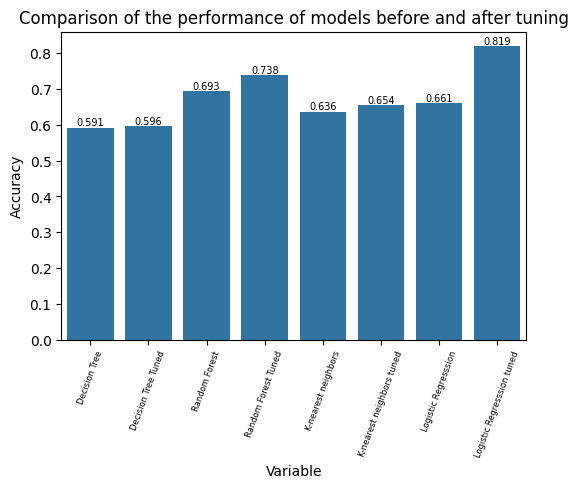

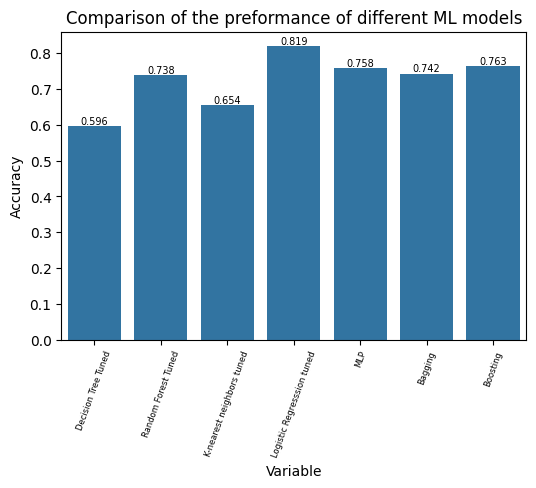

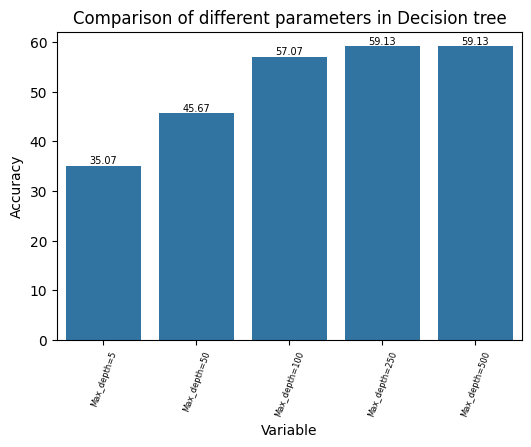

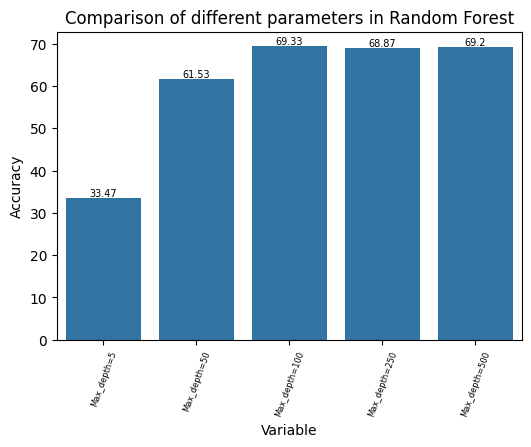

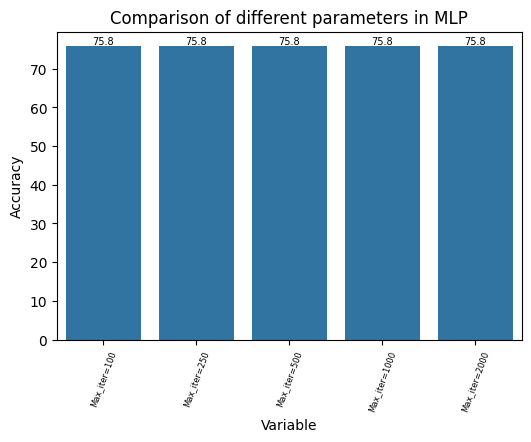

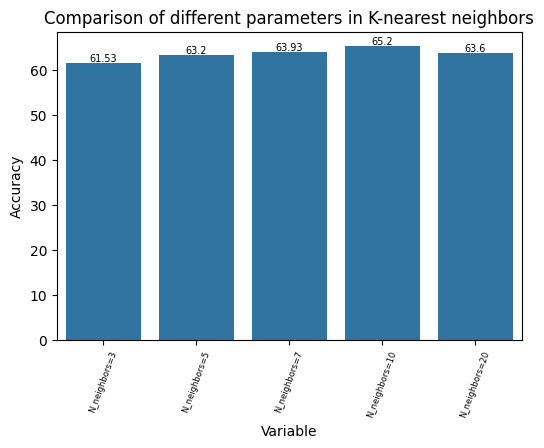

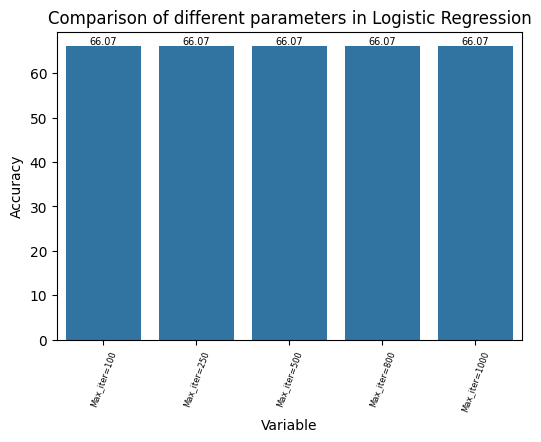

In [ ]:
#GRAPHS
Hyperparameters_graph = plot_variable_values(list_hyperparameters, "Accuracy", "Comparison of the performance of models before and after tuning")
Hyperparameters_graph


Top_graph = plot_variable_values(list_top_models, "Accuracy", "Comparison of the preformance of different ML models")
Top_graph

Tree_graph = plot_variable_values(DT_parameters_list, "Accuracy", "Comparison of different parameters in Decision tree")
Tree_graph

Forest_graph = plot_variable_values(RF_parameters_list, "Accuracy", "Comparison of different parameters in Random Forest")
Forest_graph

MLP_graph = plot_variable_values(MLP_parameters_list, "Accuracy", "Comparison of different parameters in MLP")
MLP_graph

KNN_graph = plot_variable_values(KNN_parameters_list, "Accuracy", "Comparison of different parameters in K-nearest neighbors")
KNN_graph

LOG_graph = plot_variable_values(LOG_parameters_list, "Accuracy", "Comparison of different parameters in Logistic Regression")
LOG_graph




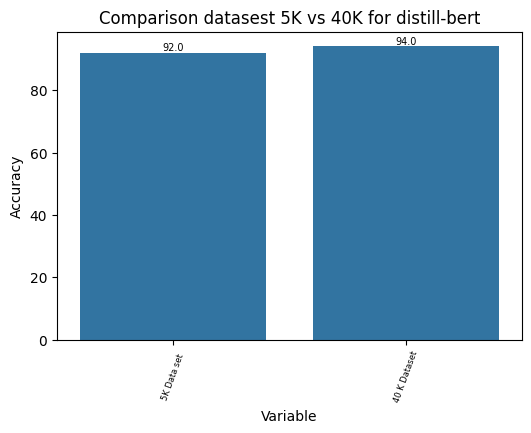

In [ ]:
# Graphs for Task 3, Distillbert
list_bert_comp = [("5K Data set ", 92),( "40 K Dataset", 94)]
distillbert_graph = plot_variable_values(list_bert_comp, "Accuracy", "Comparison datasest 5K vs 40K for distill-bert")
distillbert_graph

## **Caution on differing accuracy:**
On the first project the results for AUTO ML on 5K was accuracy of 93.8 and AUTO ML on 40 K was 96.2
These are the results that you find in the resumé.
They differ from the results of the second run of AUTOML that you find below in the code.


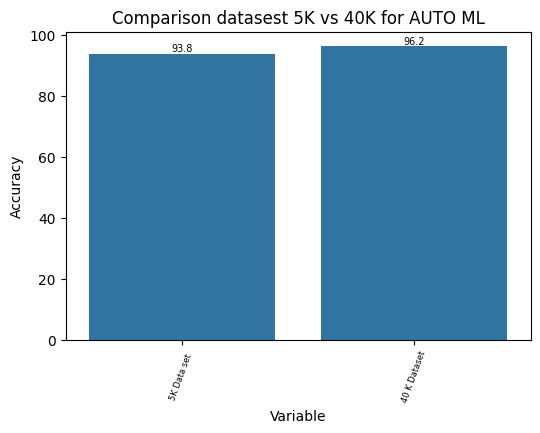

In [2]:
# Graphs for Task 3, AUTO ML
list_bert_comp = [("5K Data set ", 93.8),( "40 K Dataset", 96.2)]
autoML_graph = plot_variable_values(list_bert_comp, "Accuracy", "Comparison datasest 5K vs 40K for AUTO ML")
autoML_graph

## **Task3**

In [ ]:
%pip install torch

In [ ]:
import torch as torch

In [ ]:
from transformers import TrainingArguments, Trainer


In [ ]:
device = torch.device("cuda")

##**Import Packages and Modules**

In [ ]:
!pip install evaluate
from evaluate import load
import evaluate



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install transformers
!pip install datasets
!pip install tokenizer
!pip install torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 kB 9.4 MB/s eta 0:00:00


In [ ]:

from torch import torch
import transformers
from transformers import AutoTokenizer


In [ ]:
from google.colab import drive

In [ ]:
from transformers import AutoModelForSequenceClassification

## **Connect to Google Drive**

In [ ]:
drive.mount('/content/drive', force_remount=True)
dir_checkpoint=('/content/drive/models_dir')
dir_model=('/content/drive/models_dir/Checkpoint')


Mounted at /content/drive


## **Prepare Training Set**

##**Load dataset**, **tokenize data set, split data**

In [ ]:
# data set 5K
from datasets import Dataset
df = data
train_data = df[:3500]
val_data = df[3500:4250]
test_data = df[4250:]

train_dataset_5K = Dataset.from_pandas(train_data)
val_dataset_5K = Dataset.from_pandas(val_data)
test_dataset_5K = Dataset.from_pandas(test_data)



In [ ]:
# datatset 40K - 8 times larger data set
import pandas as pd
from datasets import Dataset

df = pd.read_parquet("hf://datasets/dair-ai/emotion/unsplit/train-00000-of-00001.parquet")
print((df))

train_data_40K = df[:25000]
val_data_40K = df[25000:33000]
test_data_40K = df[33000:40000]


train_dataset_40K = Dataset.from_pandas(train_data_40K)
val_dataset_40K = Dataset.from_pandas(val_data_40K)
test_dataset_40K = Dataset.from_pandas(test_data_40K)
print(train_dataset_40K, val_dataset_40K, test_dataset_40K)

                                                     text  label
0       i feel awful about it too because it s my job ...      0
1                                   im alone i feel awful      0
2       ive probably mentioned this before but i reall...      1
3                i was feeling a little low few days back      0
4       i beleive that i am much more sensitive to oth...      2
...                                                   ...    ...
416804  that was what i felt when i was finally accept...      1
416805  i take every day as it comes i m just focussin...      4
416806      i just suddenly feel that everything was fake      0
416807  im feeling more eager than ever to claw back w...      1
416808  i give you plenty of attention even when i fee...      0

[416809 rows x 2 columns]
Dataset({
    features: ['text', 'label'],
    num_rows: 25000
}) Dataset({
    features: ['text', 'label'],
    num_rows: 8000
}) Dataset({
    features: ['text', 'label'],
    num_rows: 7000


In [ ]:
from transformers import AutoTokenizer

# Load a pre-trained tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define the tokenize_function
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Tokenize the datasets, 5K
tokenized_train_5K = train_dataset_5K.map(tokenize_function, batched=True)
tokenized_validation_5K = val_dataset_5K.map(tokenize_function, batched=True)


Map:   0%|          | 0/3500 [00:00<?, ? examples/s]

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

In [ ]:
# Tokenize the datasets, 40K
tokenized_train_40K = train_dataset_40K.map(tokenize_function, batched=True)
tokenized_validation_40K = val_dataset_40K.map(tokenize_function, batched=True)


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

In [ ]:
# TOKENIZER 5K

tokenizer_5K = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_5K(train_dataset_5K['text'], padding="max_length", truncation=True, return_tensors = "pt")
tokenizer_5K(val_dataset_5K['text'], padding="max_length", truncation=True, return_tensors= "pt")
tokenizer_5K(test_dataset_5K['text'], padding="max_length", truncation=True, return_tensors = "pt")
#tokenizer_5K.save_pretrained(dir_model)



{'input_ids': tensor([[ 101, 1045, 2514,  ...,    0,    0,    0],
        [ 101, 1045, 2371,  ...,    0,    0,    0],
        [ 101, 1045, 2514,  ...,    0,    0,    0],
        ...,
        [ 101, 2076, 8921,  ...,    0,    0,    0],
        [ 101, 1045, 2106,  ...,    0,    0,    0],
        [ 101, 1045, 2448,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
# TOKENIZER 40K

tokenizer_40K = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_40K(train_dataset_5K['text'], padding="max_length", truncation=True, return_tensors = "pt")
tokenizer_40K(val_dataset_5K['text'], padding="max_length", truncation=True, return_tensors= "pt")
tokenizer_40K(test_dataset_5K['text'], padding="max_length", truncation=True, return_tensors = "pt")




{'input_ids': tensor([[ 101, 1045, 2514,  ...,    0,    0,    0],
        [ 101, 1045, 2371,  ...,    0,    0,    0],
        [ 101, 1045, 2514,  ...,    0,    0,    0],
        ...,
        [ 101, 2076, 8921,  ...,    0,    0,    0],
        [ 101, 1045, 2106,  ...,    0,    0,    0],
        [ 101, 1045, 2448,  ...,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

##**Pre-Training Tasks**

###**Load the pre-trained distillbert uncased model**

In [ ]:
checkpoint="distilbert-base-uncased"

# access 'labels' in DataDictSet
num_labels = train_dataset_5K['label']
# make a set from that collection, so only unique values are there
num_labels = len(set(num_labels))
print(num_labels)
label2id = {0: "sadness", 1: "joy", 2:"love", 3: "anger", 4: "fear", 5: "surprise"}
id2label= {"sadness": 0, "joy": 1, "love": 2, "anger" : 3, "fear" : 4, "surprise" : 5}




model = AutoModelForSequenceClassification.from_pretrained(checkpoint,
                                                           num_labels=num_labels,
                                                           label2id= label2id,
                                                           id2label=id2label)


6


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


###**Training Arguments**

In [ ]:
save_total_limit=2
load_best_model_at_end=True
eval_strategy="steps"
save_strategy="steps"
logging_strategy="steps"


#**Initialize and Train Model on 5K Dataset**

In [ ]:
# Define training arguments

from transformers import TrainingArguments, Trainer

device = torch.device("cuda") #if torch.cuda.is_available() else print("not available") #torch.device("cpu")
model.to(device)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    report_to = "none",
)
#model.to(device)

trainer = Trainer( # instantiate class
    model= model, # distillbert
    args=training_args,
    train_dataset=tokenized_train_5K,
    eval_dataset=tokenized_validation_5K,
    tokenizer=tokenizer,
    #compute_metrics=compute_metrics, #evaluation metrics is given here

)

trainer.train()
#trainer.save_model(dir_model)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-26-7de1446e3f53>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer( # instantiate class


Epoch,Training Loss,Validation Loss
1,0.341000,0.326260
2,0.176300,0.255509
3,0.119500,0.260827


TrainOutput(global_step=657, training_loss=0.3514416984862207, metrics={'train_runtime': 540.5073, 'train_samples_per_second': 19.426, 'train_steps_per_second': 1.216, 'total_flos': 1391006905344000.0, 'train_loss': 0.3514416984862207, 'epoch': 3.0})

#**Caution evaluation on distillbert on 5K dataset**:
This project was coded on Google colab.
Because of runtime reconnction the values of fine tuned model couldn't be accessed by evaluation (when I re-ran it). That's why the error message.
On earlier evaluation the result after model training: 0.92 - sorry for that inconvenience!
But believe me, I was also very annoyed.

In [ ]:
%pip install scikit-learn


In [ ]:
# evaluation for 5K training, sorry runtime disconnected. result was 0.9173 . I don't want to train the model again.
import evaluate
import numpy as np

metric = evaluate.load("accuracy")
predictions, labels, _ = trainer.predict(tokenized_validation_40K)
# Convert predictions to the predicted labels (class indices)
preds = np.argmax(predictions, axis=-1)
accuracy = metric.compute(predictions=preds, references=labels)
print("Accuracy:", accuracy)

ModuleNotFoundError: No module named 'evaluate'

In [ ]:
# evaluation for 5K training
import evaluate
import numpy as np

metric = evaluate.load("accuracy")
predictions, labels, _ = trainer.predict(tokenized_validation_40K)
# Convert predictions to the predicted labels (class indices)
preds = np.argmax(predictions, axis=-1)
accuracy = metric.compute(predictions=preds, references=labels)
print("Accuracy:", accuracy)

##**Initialize and Train Model on 40K Dataset**

In [ ]:
# 40K
# Define training arguments

from transformers import TrainingArguments, Trainer

device = torch.device("cuda") #if torch.cuda.is_available() else print("not available") #torch.device("cpu")
model.to(device)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    report_to = "none",
)
#model.to(device)

trainer = Trainer( # instantiate class
    model= model, # distillbert
    args=training_args,
    train_dataset=tokenized_train_40K,
    eval_dataset=tokenized_validation_40K,
    tokenizer=tokenizer,
    #compute_metrics=compute_metrics, #evaluation metrics is given here

)

trainer.train()
#trainer.save_model(dir_model)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-33-4e3fb77e33f6>:22: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer( # instantiate class


Epoch,Training Loss,Validation Loss
1,0.099200,0.139132
2,0.143100,0.128286
3,0.071900,0.148142


TrainOutput(global_step=4689, training_loss=0.1401356498069869, metrics={'train_runtime': 3852.1534, 'train_samples_per_second': 19.47, 'train_steps_per_second': 1.217, 'total_flos': 9935763609600000.0, 'train_loss': 0.1401356498069869, 'epoch': 3.0})

#**Caution evaluation on distillbert on 40K dataset**:
This project was coded on Google colab.
Because of runtime reconnction the values of fine tuned model couldn't be accessed by evaluation (when I re-ran it). That's why the error message.
On earlier evaluation the result after model training: 0.94

In [ ]:
# evaluation for 40K training. Sorry runtime disconnected after training. Score was 0.94
import evaluate
import numpy as np

metric = evaluate.load("accuracy")
predictions, labels, _ = trainer.predict(tokenized_validation_40K)
# Convert predictions to the predicted labels (class indices)
preds = np.argmax(predictions, axis=-1)
accuracy = metric.compute(predictions=preds, references=labels)
print("Accuracy:", accuracy)

ModuleNotFoundError: No module named 'evaluate'

#**Load the saved model**

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(models_dir)

#**Create the Pipeline**

In [ ]:
from transformers import TextClassificationPipeline, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

pipeline = TextClassificationPipeline(
    model=model,
    tokenizer=tokenizer,
    task="sentiment-analysis"
)



In [ ]:
%pip install tpot
%pip install datasets

In [ ]:
# trained with 5K data set
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(generations=5, population_size=50, cv=5, random_state=42, verbosity=2, config_dict = "TPOT sparse")
pipeline_optimizer.fit(X_train, y_train)
print("TPOT Best Pipeline:", pipeline_optimizer.fitted_pipeline_)
print("TPOT Test Accuracy:", pipeline_optimizer.score(X_test, y_test))


is_classifier
is_classifier


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8814285714285715

Generation 2 - Current best internal CV score: 0.8814285714285715

Generation 3 - Current best internal CV score: 0.8822857142857142

Generation 4 - Current best internal CV score: 0.8908571428571429

Generation 5 - Current best internal CV score: 0.8914285714285715

Best pipeline: LinearSVC(input_matrix, C=1.0, dual=False, loss=squared_hinge, penalty=l1, tol=0.001)
TPOT Best Pipeline: Pipeline(steps=[('linearsvc',
                 LinearSVC(dual=False, penalty='l1', random_state=42,
                           tol=0.001))])
TPOT Test Accuracy: 0.8846666666666667


In [ ]:
# prepare data for 40K data set

import pandas as pd
from datasets import Dataset

df = pd.read_parquet("hf://datasets/dair-ai/emotion/unsplit/train-00000-of-00001.parquet")
print((df))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


                                                     text  label
0       i feel awful about it too because it s my job ...      0
1                                   im alone i feel awful      0
2       ive probably mentioned this before but i reall...      1
3                i was feeling a little low few days back      0
4       i beleive that i am much more sensitive to oth...      2
...                                                   ...    ...
416804  that was what i felt when i was finally accept...      1
416805  i take every day as it comes i m just focussin...      4
416806      i just suddenly feel that everything was fake      0
416807  im feeling more eager than ever to claw back w...      1
416808  i give you plenty of attention even when i fee...      0

[416809 rows x 2 columns]


In [ ]:
df = df[:40000]

In [ ]:
# Vectorize training data & testing data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)
X_40K = vectorizer.fit_transform(df["text"])

In [ ]:
print(type(X_40K))

<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train_40K, X_test_40K, y_train_40K, y_test_40K = train_test_split(X_40K, df["label"], test_size=0.3, random_state=1)
print(X_train_40K.shape[0])

28000


# **Caution TPOT on 40K dataset:**
this project was coded on colab. While training TPOT on 40K dataset, the GPU runtime limit if google was reached and interrupted the training process.
On the local CPU it took 5:30 hours and the training process was interrupted once by missing internet connection and second time by low battery.
A third try would have delayed the hand in even more, that is why the results of TPOT 40K are not there.  

In [ ]:
# trained with 40K data set
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(generations=5, population_size=50, cv=5, random_state=42, verbosity=2, config_dict = "TPOT sparse")
pipeline_optimizer.fit(X_train_40K, y_train_40K)
print("TPOT Best Pipeline:", pipeline_optimizer.fitted_pipeline_)
print("TPOT Test Accuracy:", pipeline_optimizer.score(X_test_40K, y_test_40K))


is_classifier
is_classifier


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_regressor


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/memory.py", line 312, in __call__
    return self

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]